In [1]:
# 引入所需要的全部包
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures  # 特征的构造 
from sklearn.pipeline import Pipeline  # pipeline可把多个estimators级联成一个estimator

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [4]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [6]:
# 加载数据
path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names2 = df.columns
print(names2)
names = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0,how = 'any') # 只要有数据为空，就进行删除操作

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


准确率: 0.48506578175142084


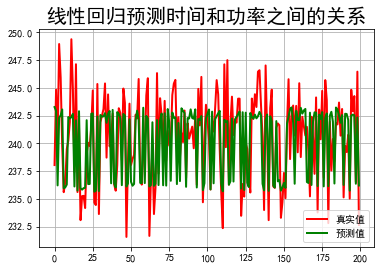

In [7]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values

# 对数据集进行测试集合训练集划分 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print("准确率:",lr.score(X_test, Y_test))

## 预测值和实际值画图比较
t = np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#网格
plt.show()

1阶，系数为： [ 2.39926650e+02  0.00000000e+00 -1.11022302e-16  3.97781449e+00
  8.73334650e-01  1.70647992e-01  0.00000000e+00]
2阶，系数为： [ 1.23998300e+02  1.42108547e-14 -1.42108547e-14  5.34497071e+01
  2.95068077e+00  2.69407641e-01 -7.10542736e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.02461452e+02 -2.50100464e+01
 -5.18469319e-01  0.00000000e+00 -1.02427364e+01 -4.65982219e-01
  0.00000000e+00 -3.55472266e-02  0.00000000e+00  0.00000000e+00]
3阶，系数为： [-3.48923835e+11  1.08969903e+10  5.53138831e+11 -1.46880239e+12
 -8.25259762e+10  3.19287036e+10  1.98804398e+11  1.70194093e+09
  8.85656970e+10 -1.54916033e+10 -7.53209551e+10  8.67554136e+10
  2.60556376e+10  1.63933079e+10 -3.57894606e+10  5.74033329e+10
 -3.94728071e+09  2.44140625e-04  9.97408775e+11  3.32527437e+10
 -1.28652461e+10  0.00000000e+00  1.09942627e+00  3.41613770e-01
  0.00000000e+0

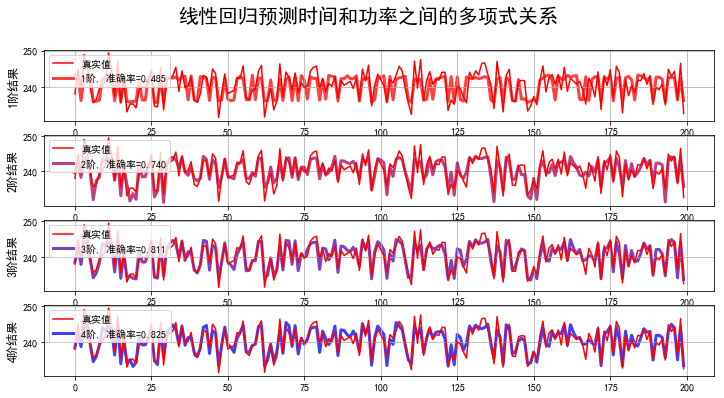

In [9]:
## 时间和电压之间的关系(Linear-多项式)
# Pipeline：管道的意思，将多个操作合并成为一个操作
# Pipleline总可以给定多个不同的操作，给定每个不同操作的名称即可，执行的时候，按照从前到后的顺序执行
# Pipleline对象在执行的过程中，当调用某个方法的时候，会调用对应过程的对应对象的对应方法
# eg：在下面这个案例中，调用了fit方法，
# 那么对数据调用第一步操作：PolynomialFeatures的fit_transform方法对数据进行转换并构建模型
# 然后对转换之后的数据调用第二步操作: LinearRegression的fit方法构建模型
# eg: 在下面这个案例中，调用了predict方法，
# 那么对数据调用第一步操作：PolynomialFeatures的transform方法对数据进行转换
# 然后对转换之后的数据调用第二步操作: LinearRegression的predict方法进行预测
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),  # 给定进行多项式扩展操作， 第一个操作：多项式扩展
            ('Linear', LinearRegression(fit_intercept=False)) # 第二个操作，线性回归
            ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)  # 训练并转换
X_test = ss.transform(X_test)  ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t = np.arange(len(X_test))  # 划定x轴的范围
N = 5
d_pool = np.arange(1,N,1) # 阶 array([1, 2, 3, 4])
m = d_pool.size  # m = 4
clrs = [] # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c))  # clrs = ['#ff0000', '#aa0055', '#5500aa', '#0000ff']
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')  # 创建一个绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    # plt.subplot(N-1,1,i+1)在Figure对象下创建子图 
    # subplot(numRows, numCols, plotNum)整个绘图区被分为numRows 行和 numCols 列
    # plotNum 参数指定创建的 Axes 对象所在的区域，但是：从1开始
    plt.subplot(N-1,1,i+1)  
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    ### 设置管道对象中的参数值，Poly是在管道对象中定义的操作名称， 
    # 后面跟参数名称；中间是两个下划线 d = 1, 2, 3, 4
    model.set_params(Poly__degree=d)  ## 设置多项式的阶乘
    model.fit(X_train, Y_train) # 模型训练:先调用poly再调用linear
    # Linear是管道中定义的操作名称
    # 获取线性回归算法模型对象
    lin = model.get_params()['Linear']
    output = u'%d阶，系数为：' % d
    # hasattr用来判断lin对象中是否有对应的属性
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
    print (output, lin.coef_.ravel())
    
    # 模型结果预测
    y_hat = model.predict(X_test)
    # 计算评估值
    s = model.score(X_test, Y_test)
    
    # 画图
    z = N - 1 if (d == 2) else 0  # 似乎没啥用
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()